In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
A = np.array([
    [1,1,0],
    [1,1,1],
    [0,1,1]])

A_sym = sp.Matrix(A)

auto_val = A_sym.eigenvals()
auto_vec = A_sym.eigenvects()

print(auto_val.items())
print(auto_vec)



dict_items([(1, 1), (1 - sqrt(2), 1), (1 + sqrt(2), 1)])
[(1, 1, [Matrix([
[-1],
[ 0],
[ 1]])]), (1 - sqrt(2), 1, [Matrix([
[       1],
[-sqrt(2)],
[       1]])]), (1 + sqrt(2), 1, [Matrix([
[      1],
[sqrt(2)],
[      1]])])]


In [20]:
## Criar Polinomio em numpy:
#vetor com cada indice sendo os graus
poly_car = np.array([1, -3., 0, 1]) #1x**3 - 3y**2 + z

In [21]:
# Auto valores em Numpy
autovalores, autovetores =  np.linalg.eig(A)

autovalores = np.real(autovalores) #garante somente a parte real, se o numero for imaginario
autovetores = np.imag(autovetores)

print(autovalores)
print(autovetores)

[-0.41421356  1.          2.41421356]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


🎨 Visualizando Transformação Linear 2D
Matriz A:
[[2 1]
 [0 1]]
Autovalores: [2. 1.]
Autovetores:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


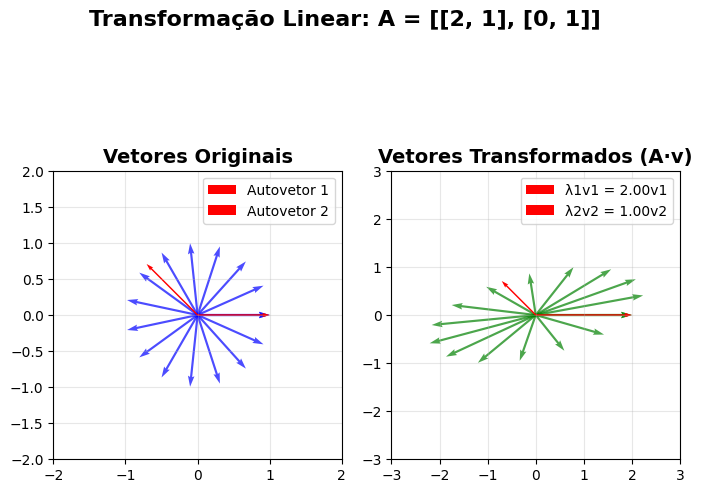

In [22]:
"""
Visualiza como uma matriz 2x2 transforma vetores
"""

print("🎨 Visualizando Transformação Linear 2D")
print("=" * 40)

A = np.array([[2, 1]
            , [0, 1]])
# Calcular autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

print(f"Matriz A:")
print(A)
print(f"Autovalores: {autovalores}")
print(f"Autovetores:\n{autovetores}")

# Criar grade de vetores
theta = np.linspace(0, 2*np.pi, 16)
vetores_originais = np.array([np.cos(theta), np.sin(theta)])

# Aplicar transformação
vetores_transformados = A @ vetores_originais

# Criar figura
fig, axes = plt.subplots(1, 2, figsize=(7,6))

# Plot 1: Vetores originais
ax1 = axes[0]
ax1.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_originais[0], vetores_originais[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='blue')

# Adicionar autovetores originais
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'Autovetor {i+1}')

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Vetores Originais', fontsize=14, fontweight='bold')
ax1.legend()

# Plot 2: Vetores transformados
ax2 = axes[1]
ax2.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_transformados[0], vetores_transformados[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='green')

# Adicionar autovetores transformados (escalados pelos autovalores)
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        v_transformado = lam * v
        ax2.quiver(0, 0, v_transformado[0], v_transformado[1], 
                    angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'λ{i+1}v{i+1} = {lam:.2f}v{i+1}')

# Determinar limites baseados na transformação
max_val = max(np.max(np.abs(vetores_transformados)), 3)
ax2.set_xlim(-max_val, max_val)
ax2.set_ylim(-max_val, max_val)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Vetores Transformados (A·v)', fontsize=14, fontweight='bold')
ax2.legend()

plt.suptitle(f'Transformação Linear: A = {A.tolist()}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [23]:
"""
Aplicação: Algoritmo PageRank (Google)
"""
# Matriz de adjacência (quem aponta para quem)
# Páginas: A, B, C, D, E
paginas = ['A', 'B', 'C', 'D', 'E']
n_paginas = len(paginas)

# Links: A->B,C; B->C; C->A,B; D->B,C,E; E->A,D
adjacencia = np.array([
    [0, 1, 1, 0, 0],  # A aponta para B, C
    [0, 0, 1, 0, 0],  # B aponta para C
    [1, 1, 0, 0, 0],  # C aponta para A, B
    [0, 1, 1, 0, 1],  # D aponta para B, C, E
    [1, 0, 0, 1, 0]   # E aponta para A, D
])


print("Matriz de adjacência:")
print("   ", " ".join(paginas))
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {adjacencia[i]}")

Matriz de adjacência:
    A B C D E
A: [0 1 1 0 0]
B: [0 0 1 0 0]
C: [1 1 0 0 0]
D: [0 1 1 0 1]
E: [1 0 0 1 0]


Text(0.5, 1.0, 'Rede de Páginas Web')

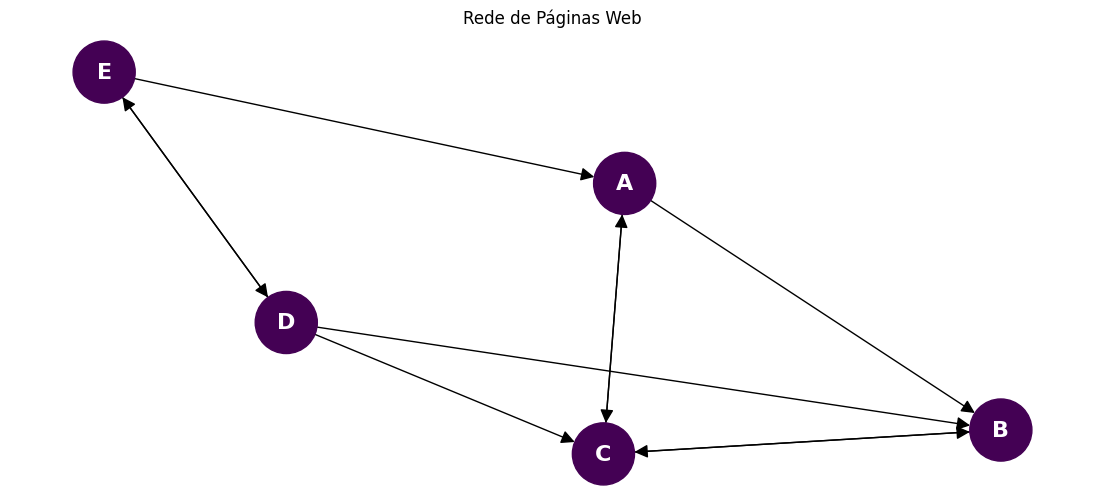

In [24]:
# Visualizar rede e resultados
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))

# Plot 1: Rede de páginas
G_nx = nx.DiGraph()

# Adicionar nós e arestas
for i, pagina in enumerate(paginas):
    G_nx.add_node(pagina)

for i in range(n_paginas):
    for j in range(n_paginas):
        if adjacencia[i, j] > 0:
            G_nx.add_edge(paginas[i], paginas[j])

# Layout e desenho
pos = nx.spring_layout(G_nx, seed=42)

# Tamanho dos nós proporcional ao PageRank
node_sizes = [2000 for i in range(adjacencia.shape[0])]
node_colors = [0.5 for i in range(adjacencia.shape[0])]

nx.draw(G_nx, pos, ax=ax1, with_labels=True, node_size=node_sizes,
        node_color=node_colors,  arrows=True, 
        arrowsize=20, font_size=16, font_weight='bold',font_color='w')
ax1.set_title('Rede de Páginas Web')


In [25]:
# Construir matriz de transição (Google Matrix)
# Normalizar por linha (probabilidade de seguir cada link)
soma_links = np.sum(adjacencia, axis=1)

# Tratar páginas sem links de saída (dangling nodes)
for i in range(n_paginas):
    if soma_links[i] == 0:
        adjacencia[i] = 1  # Aponta para todas as páginas igualmente
        soma_links[i] = n_paginas

# Matriz de transição estocástica
M = adjacencia / soma_links[:, np.newaxis]

print(f"\nMatriz de transição M:")
print(M)


Matriz de transição M:
[[0.         0.5        0.5        0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.5        0.         0.         0.5        0.        ]]


In [26]:
# Adicionar fator de amortecimento (damping factor)
d = 0.85  # Probabilidade de seguir um link
# (1-d)/n: Probabilidade de pular para qualquer página aleatoriamente



G = d * M + (1 - d) / n_paginas * np.ones((n_paginas, n_paginas))

print(f"\nGoogle Matrix G (com damping factor d={d}):")
print(G)

print(G.sum(axis=1))


Google Matrix G (com damping factor d=0.85):
[[0.03       0.455      0.455      0.03       0.03      ]
 [0.03       0.03       0.88       0.03       0.03      ]
 [0.455      0.455      0.03       0.03       0.03      ]
 [0.03       0.31333333 0.31333333 0.03       0.31333333]
 [0.455      0.03       0.03       0.455      0.03      ]]
[1. 1. 1. 1. 1.]


In [28]:
p = np.zeros(5, dtype=float)#5 é o numero de paginas
p[0] = 1
p1 = G @ p

print((p1))

p2 = G @ p1
print(p2)

[0.03  0.03  0.455 0.03  0.455]
[0.236125   0.41675    0.0555     0.29633333 0.0555    ]


In [ ]:
def prob_estabilizacao(G):
    autoval, autovec = np.linalg.eig(G.T)
    for i in range(len(autoval)):
        if np.isclose(autoval[i], 1):
            print(np.real(autovec[:, i]))

prob_estabilizacao(G)

[-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]


In [42]:
A = np.array([[-1., 0], [0, -2]])
B = np.array([[ 1., 0], [0,  2]])
C = np.array([[ 0.,-1], [1,  0]])
D = np.random.rand(4, 4, 4, 4)

E1 = np.random.rand(100, 100)
E = E1.T @ E1

auto_val, auto_vec = np.linalg.eig(A.T)
print(auto_val)
print(auto_vec)
auto_val, auto_vec = np.linalg.eig(B.T)
print("B", auto_val)
print(auto_vec)
auto_val, auto_vec = np.linalg.eig(C.T)
print(auto_val)
print(auto_vec)
auto_val, auto_vec = np.linalg.eig(D.T)
print(auto_val)
print(auto_vec)
auto_val, auto_vec = np.linalg.eig(E.T)
print(auto_val)
print(auto_vec)

[-1. -2.]
[[1. 0.]
 [0. 1.]]
B [1. 2.]
[[1. 0.]
 [0. 1.]]
[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]
[[[ 1.75035215+0.j          0.32452128+0.j
   -0.3345353 +0.30160168j -0.3345353 -0.30160168j]
  [ 1.55995706+0.j         -0.2542206 +0.45790677j
   -0.2542206 -0.45790677j  0.13717898+0.j        ]
  [ 1.64861335+0.j         -0.44907696+0.38687646j
   -0.44907696-0.38687646j  0.27658497+0.j        ]
  [ 2.15275967+0.j         -0.3422476 +0.j
    0.18366143+0.24238965j  0.18366143-0.24238965j]]

 [[ 2.10867137+0.j         -0.56061387+0.j
    0.35687088+0.08354677j  0.35687088-0.08354677j]
  [ 1.89397119+0.j          0.47021572+0.j
    0.09521863+0.j         -0.02690432+0.j        ]
  [ 2.38892256+0.j         -0.42954737+0.j
    0.39936069+0.10719792j  0.39936069-0.10719792j]
  [ 1.45969209+0.j         -0.20698848+0.28946023j
   -0.20698848-0.28946023j  0.18159774+0.j        ]]

 [[ 1.8303698 +0.j          0.30466876+